<a href="https://colab.research.google.com/github/HansanaNanayakkara/Deep-Learning-Mini-Project-02/blob/main/Deep_Learning_Mini_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import cv2
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/My Drive/Dialog Axiata/")
os.getcwd()

'/content/drive/My Drive/Dialog Axiata'

In [4]:
data = pd.read_csv('Dialog Axiata.csv', parse_dates=['Date'])

In [5]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [6]:
data = data.dropna()

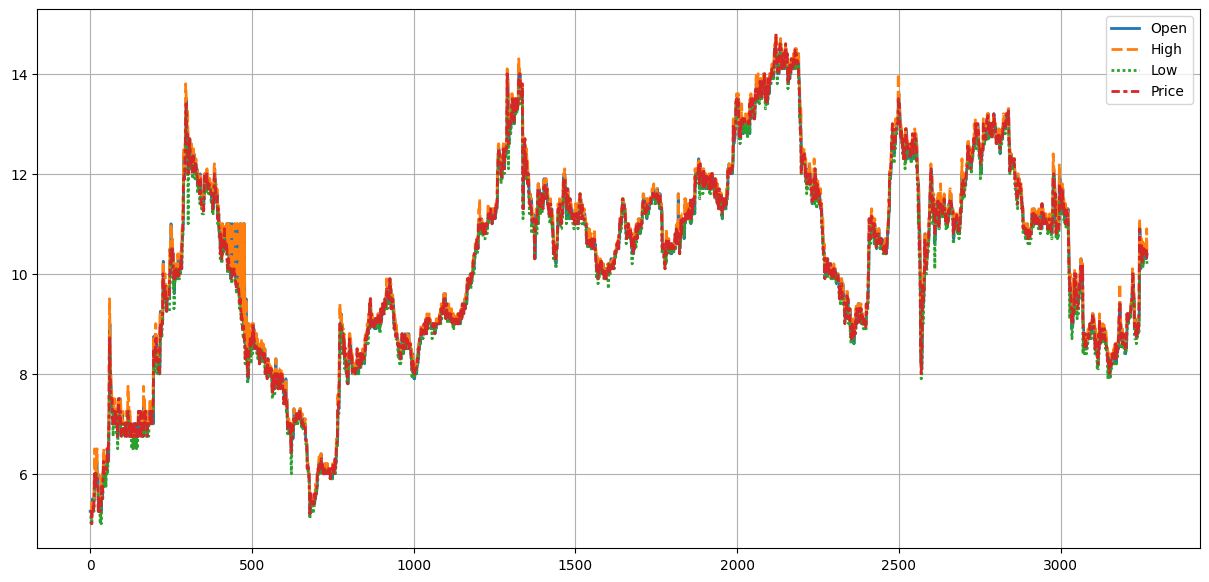

In [7]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data[['Open', 'High', 'Low', 'Price']], linewidth=2)
plt.grid(True)
plt.show()

In [8]:
df = data.filter(['Price'])

In [9]:
dataset = df.values

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
# Split the data into training and testing sets
training_data_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

In [12]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])
    y_train.append(train_data[i, 0])


In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [15]:
#Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2555/2555 [==============================] - 75s 28ms/step - loss: 0.0017


In [18]:
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

In [19]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 15ms/step


In [21]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.1161262725899914


In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-22-c6cb20b0ec05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


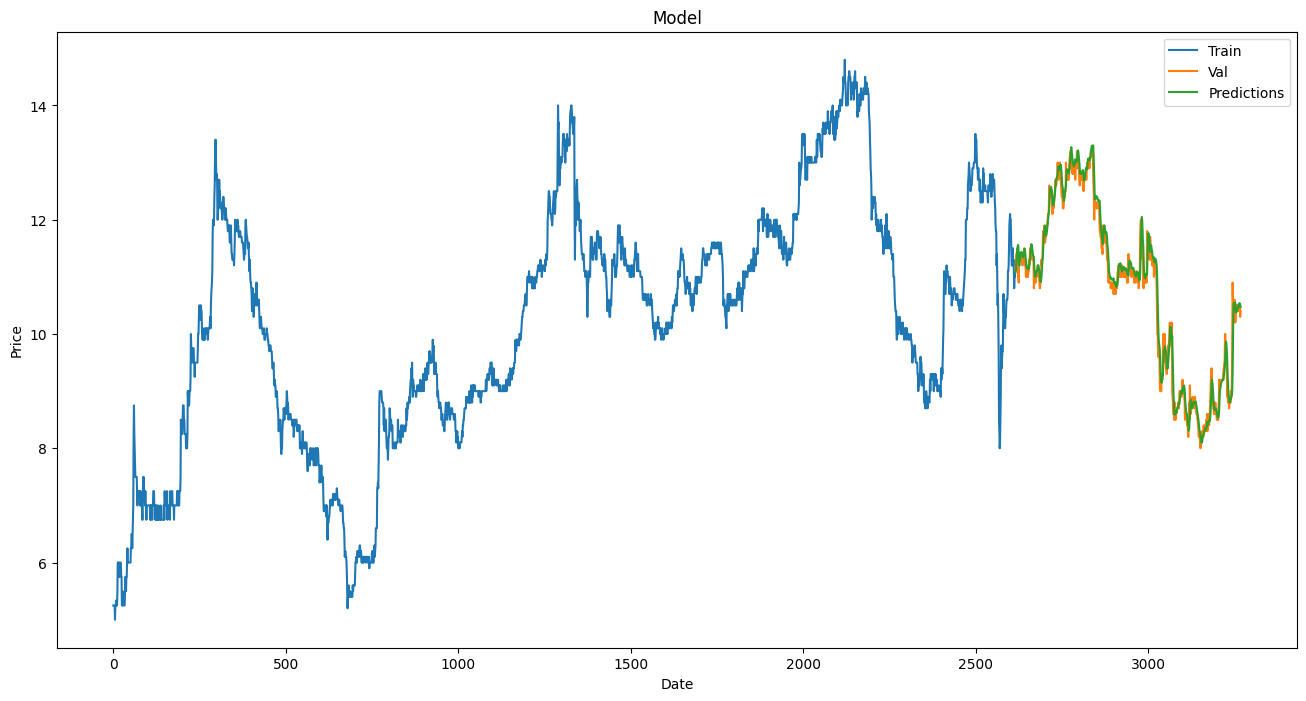

In [23]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [28]:
import pandas as pd
valid_prices = valid['Price'].to_numpy()
predicted_prices = predictions.flatten()
price_data = pd.DataFrame({'Actual Price': valid_prices, 'Predicted Price': predicted_prices})
print(price_data.to_string())


     Actual Price  Predicted Price
0            11.1        11.085264
1            11.3        11.122857
2            11.4        11.213897
3            11.4        11.327099
4            11.4        11.416132
5            11.5        11.470508
6            11.5        11.524419
7            11.4        11.559874
8            11.0        11.547376
9            10.9        11.403102
10           11.3        11.224799
11           11.4        11.198521
12           11.3        11.260761
13           11.4        11.311268
14           11.4        11.376221
15           11.3        11.428513
16           11.3        11.432713
17           11.4        11.418697
18           11.3        11.430136
19           11.3        11.416720
20           11.2        11.398791
21           11.3        11.354616
22           11.4        11.343143
23           11.4        11.375010
24           11.4        11.413660
25           11.5        11.444884
26           11.3        11.494333
27           11.2   